In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_energy = pd.read_csv("D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_data_energy.csv")

In [3]:
df_weather = pd.read_csv("D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_data_weather.csv")

In [4]:
df_energy.head(5)

,group,Date,KWH,Next_3_Days_Energy_Total
0,1,2012-09-28,920.374,959.118667
1,1,2012-09-29,946.774,951.399333
2,1,2012-09-30,997.614,919.995000
3,1,2012-10-01,932.968,918.231000
4,1,2012-10-02,923.616,950.022667


In [25]:
print(df_energy.isnull().sum())

group                         0
Date                          0
KWH                         261
Next_3_Days_Energy_Total      0
dtype: int64


In [5]:
df_weather.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [26]:
print(df_weather.isnull().sum())

Date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


In [6]:
df_weather.rename(columns={'date': 'Date'}, inplace=True)
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y%m%d')

In [7]:
df_energy['Date'] = pd.to_datetime(df_energy['Date'])

In [8]:
df_energy.head(5)

,group,Date,KWH,Next_3_Days_Energy_Total
0,1,2012-09-28,920.374,959.118667
1,1,2012-09-29,946.774,951.399333
2,1,2012-09-30,997.614,919.995000
3,1,2012-10-01,932.968,918.231000
4,1,2012-10-02,923.616,950.022667


In [9]:
df_weather.head(5)

,Date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


#### merge the data

In [10]:
merged_df = pd.merge(df_energy, df_weather, on='Date', how='left')

In [11]:
merged_df.head(10)

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1,2012-09-28,920.374,959.118667,5.0,1.6,73.0,16.7,13.3,8.5,0.2,101300.0,0.0
1,1,2012-09-29,946.774,951.399333,1.0,8.7,146.0,18.1,12.7,8.6,0.0,101830.0,0.0
2,1,2012-09-30,997.614,919.995000,5.0,1.6,71.0,17.3,12.1,6.1,4.2,101870.0,0.0
3,1,2012-10-01,932.968,918.231000,6.0,2.7,85.0,17.9,15.2,13.0,2.6,101190.0,0.0
4,1,2012-10-02,923.616,950.022667,6.0,2.8,85.0,15.1,14.4,10.9,1.2,100970.0,0.0
5,1,2012-10-03,903.401,984.457000,7.0,1.6,69.0,16.4,13.1,11.0,4.6,100560.0,0.0
6,1,2012-10-04,927.676,1027.060333,3.0,7.5,128.0,15.8,11.4,6.4,6.2,100820.0,0.0
7,1,2012-10-05,1018.991,1014.076333,8.0,1.1,60.0,15.3,13.2,10.5,17.6,100700.0,0.0
8,1,2012-10-06,1006.704,997.224333,4.0,7.9,128.0,13.8,11.4,7.5,0.2,101300.0,0.0
9,1,2012-10-07,1055.486,966.853333,3.0,3.2,84.0,12.7,9.3,4.7,0.0,101790.0,0.0


In [12]:
merged_df.tail(10)

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
27978,55,2014-02-10,1162.467,1151.942667,5.0,2.6,53.0,8.7,6.7,3.8,1.4,99300.0,0.0
27979,55,2014-02-11,1129.536,1164.703000,3.0,2.7,54.0,9.3,5.4,2.0,2.0,99660.0,0.0
27980,55,2014-02-12,1147.804,1156.939333,5.0,0.8,37.0,8.6,6.0,2.6,8.2,99410.0,0.0
27981,55,2014-02-13,1178.488,1152.727667,2.0,5.6,78.0,12.4,6.2,3.8,0.4,99250.0,0.0
27982,55,2014-02-14,1167.817,1108.914667,6.0,0.0,24.0,11.0,7.8,3.1,9.8,99000.0,0.0
27983,55,2014-02-15,1124.513,1070.176000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27984,55,2014-02-16,1165.853,1018.218000,1.0,8.4,101.0,10.8,6.3,1.9,0.2,100680.0,0.0
27985,55,2014-02-17,1036.378,1010.964667,5.0,0.1,29.0,11.1,6.8,2.7,2.2,100770.0,0.0
27986,55,2014-02-18,1008.297,993.217000,5.0,1.2,45.0,11.0,9.3,7.5,5.8,100860.0,0.0
27987,55,2014-02-19,1009.979,997.178000,6.0,0.1,30.0,13.5,7.6,4.1,0.8,101120.0,0.0


In [13]:
merged_df.shape

(27988, 13)

In [14]:
print(merged_df.isnull().sum())

group                         0
Date                          0
KWH                         261
Next_3_Days_Energy_Total      0
cloud_cover                 605
sunshine                    605
global_radiation            605
max_temp                    605
mean_temp                   605
min_temp                    605
precipitation               605
pressure                    605
snow_depth                  605
dtype: int64


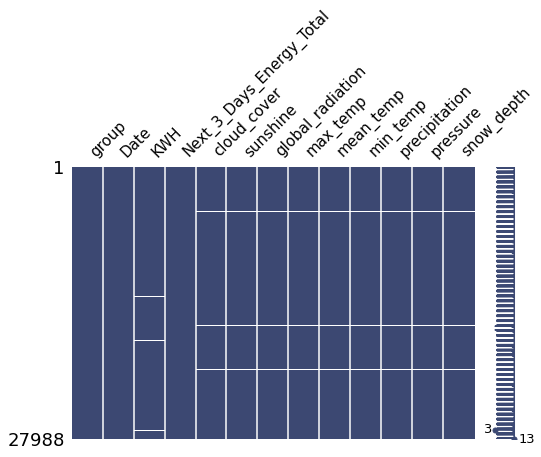

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(merged_df, figsize=(8,5), fontsize=15, color=(0.237, 0.286, 0.45))
plt.show()

In [16]:
from sklearn.impute import KNNImputer

columns_with_missing_values = merged_df.columns[merged_df.isnull().any()].tolist()
imputer = KNNImputer(n_neighbors=5)  
merged_df[columns_with_missing_values] = imputer.fit_transform(merged_df[columns_with_missing_values])

In [17]:
print(merged_df.isnull().sum())

group                       0
Date                        0
KWH                         0
Next_3_Days_Energy_Total    0
cloud_cover                 0
sunshine                    0
global_radiation            0
max_temp                    0
mean_temp                   0
min_temp                    0
precipitation               0
pressure                    0
snow_depth                  0
dtype: int64


In [18]:
merged_df.head

<bound method NDFrame.head of        group       Date       KWH  Next_3_Days_Energy_Total  cloud_cover  \
0          1 2012-09-28   920.374                959.118667          5.0   
1          1 2012-09-29   946.774                951.399333          1.0   
2          1 2012-09-30   997.614                919.995000          5.0   
3          1 2012-10-01   932.968                918.231000          6.0   
4          1 2012-10-02   923.616                950.022667          6.0   
...      ...        ...       ...                       ...          ...   
27983     55 2014-02-15  1124.513               1070.176000          3.6   
27984     55 2014-02-16  1165.853               1018.218000          1.0   
27985     55 2014-02-17  1036.378               1010.964667          5.0   
27986     55 2014-02-18  1008.297                993.217000          5.0   
27987     55 2014-02-19  1009.979                997.178000          6.0   

       sunshine  global_radiation  max_temp  mean_temp  m

In [19]:
merged_df.columns

Index(['group', 'Date', 'KWH', 'Next_3_Days_Energy_Total', 'cloud_cover',
       'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [20]:
def remove_outliers(df, col_name, method='iqr', k = 0):
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + k*iqr
    lower_threshold = q1 - k*iqr
    outliers = (df[col_name] > upper_threshold) | (df[col_name] < lower_threshold)
    
    df = df[~outliers].reset_index(drop=True)
    return df

In [21]:
col = ['KWH', 'Next_3_Days_Energy_Total', 'sunshine', 'global_radiation', 'max_temp','mean_temp', 'min_temp', 'pressure']

for col in merged_df[col]:
    df = remove_outliers(merged_df, col, method='iqr', k=1.5)

In [22]:
df.head

<bound method NDFrame.head of        group       Date       KWH  Next_3_Days_Energy_Total  cloud_cover  \
0          1 2012-09-28   920.374                959.118667          5.0   
1          1 2012-09-29   946.774                951.399333          1.0   
2          1 2012-09-30   997.614                919.995000          5.0   
3          1 2012-10-01   932.968                918.231000          6.0   
4          1 2012-10-02   923.616                950.022667          6.0   
...      ...        ...       ...                       ...          ...   
27983     55 2014-02-15  1124.513               1070.176000          3.6   
27984     55 2014-02-16  1165.853               1018.218000          1.0   
27985     55 2014-02-17  1036.378               1010.964667          5.0   
27986     55 2014-02-18  1008.297                993.217000          5.0   
27987     55 2014-02-19  1009.979                997.178000          6.0   

       sunshine  global_radiation  max_temp  mean_temp  m

In [23]:
inf_check = np.isinf(df)
print(inf_check.any())

group                       False
Date                        False
KWH                         False
Next_3_Days_Energy_Total    False
cloud_cover                 False
sunshine                    False
global_radiation            False
max_temp                    False
mean_temp                   False
min_temp                    False
precipitation               False
pressure                    False
snow_depth                  False
dtype: bool


In [24]:
nan_check = df.isna()
print(nan_check.any())

group                       False
Date                        False
KWH                         False
Next_3_Days_Energy_Total    False
cloud_cover                 False
sunshine                    False
global_radiation            False
max_temp                    False
mean_temp                   False
min_temp                    False
precipitation               False
pressure                    False
snow_depth                  False
dtype: bool


In [27]:
df.to_csv('D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/cleaned_merged_data.csv', index=False)